### Pre-Processing

In [1]:
import os
import librosa
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from processing import PreprocessingPydub, Processing

Preprocessing of audio files


KeyboardInterrupt: 

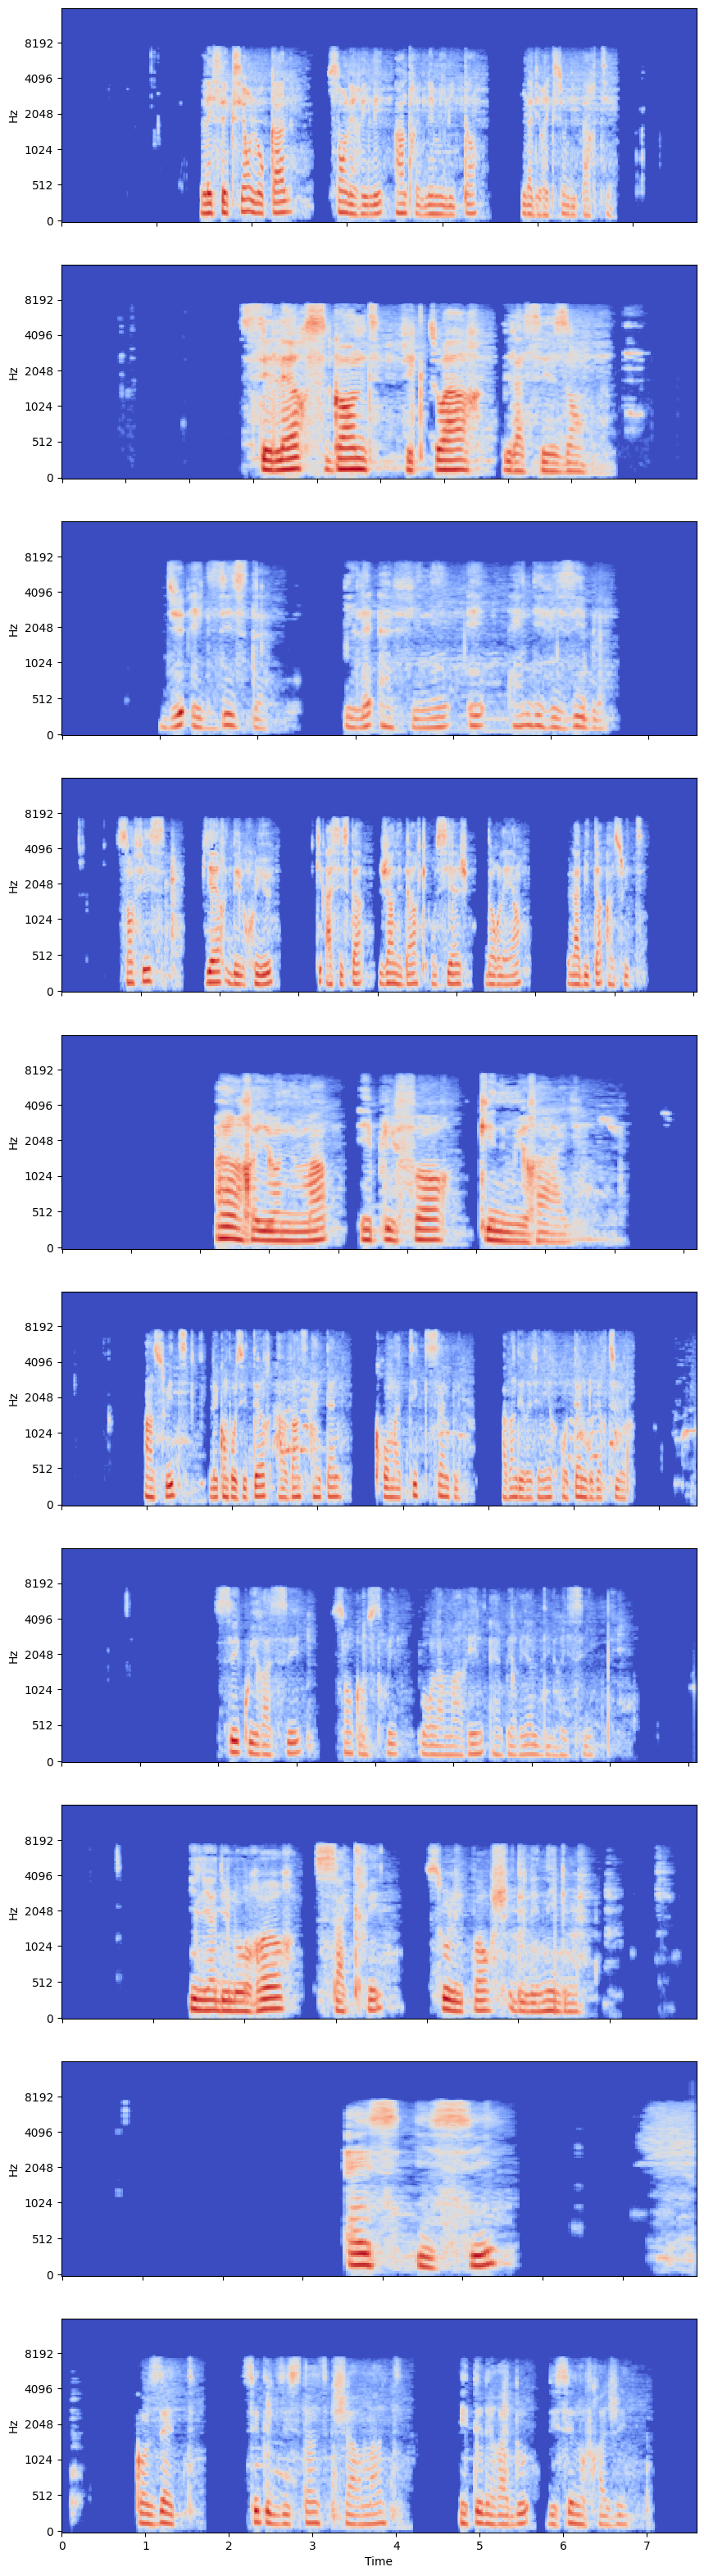

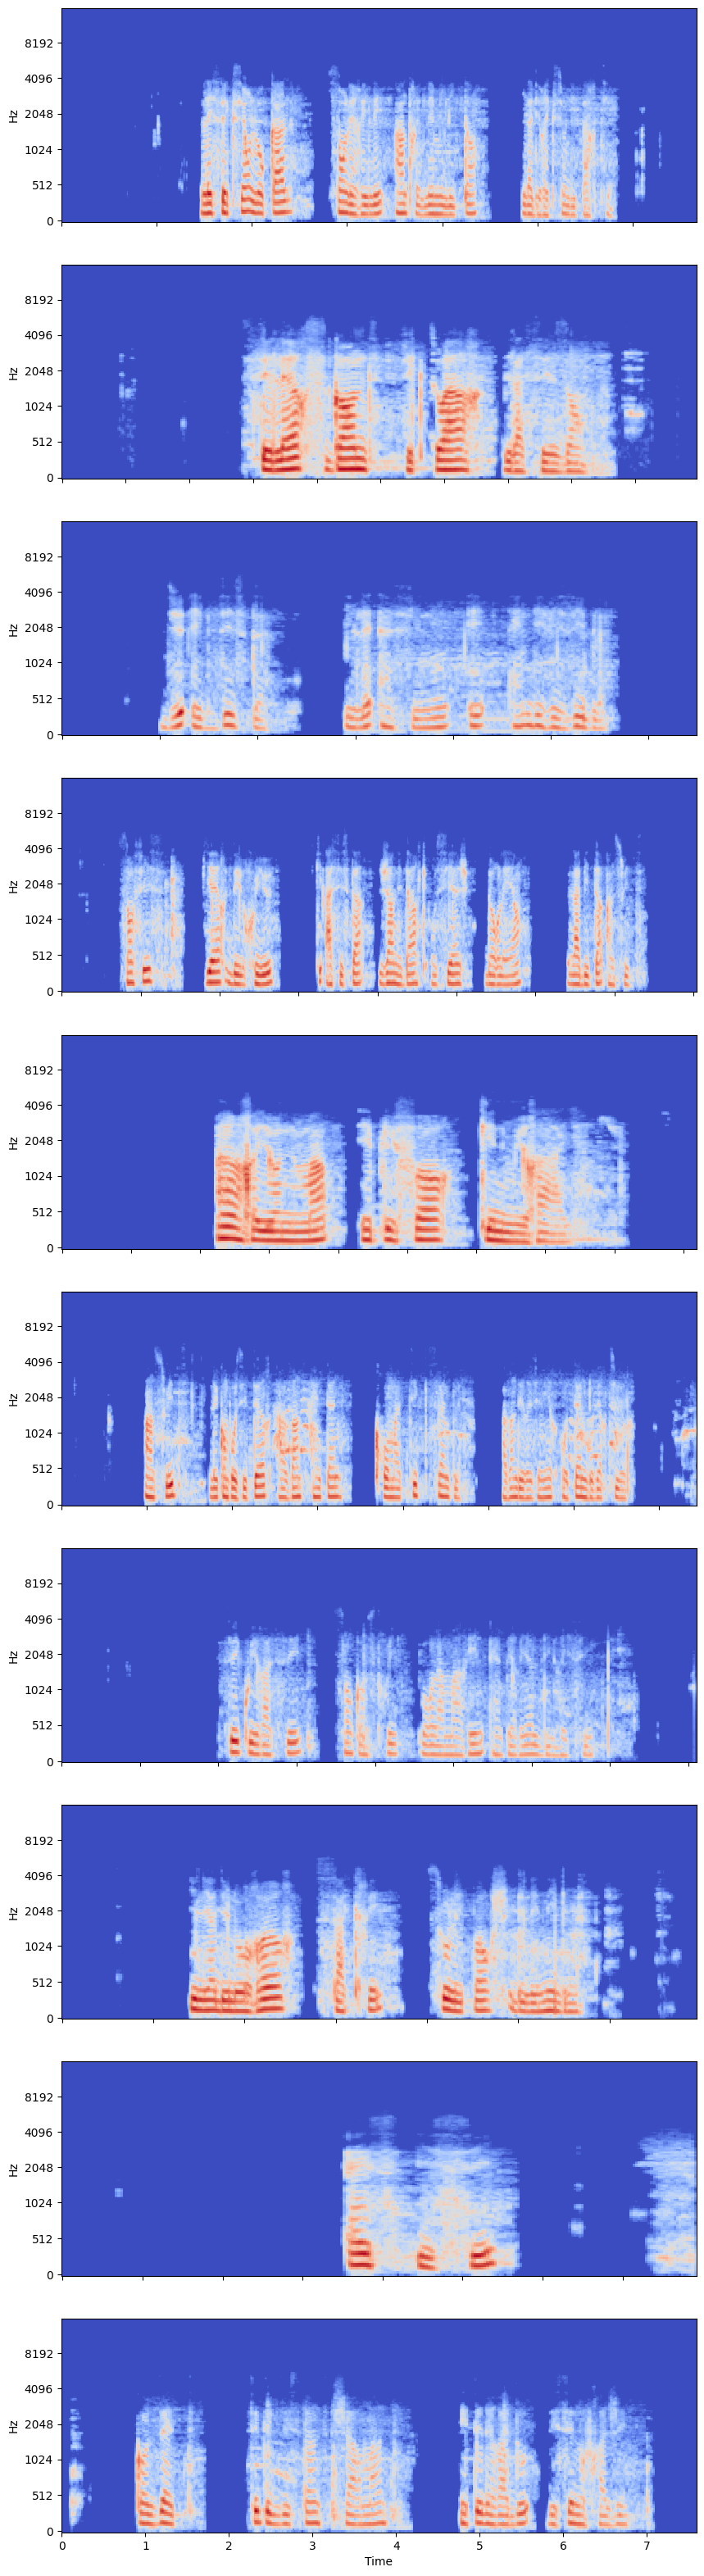

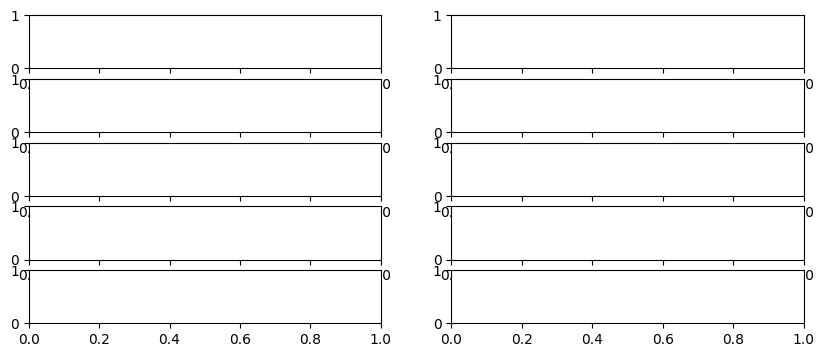

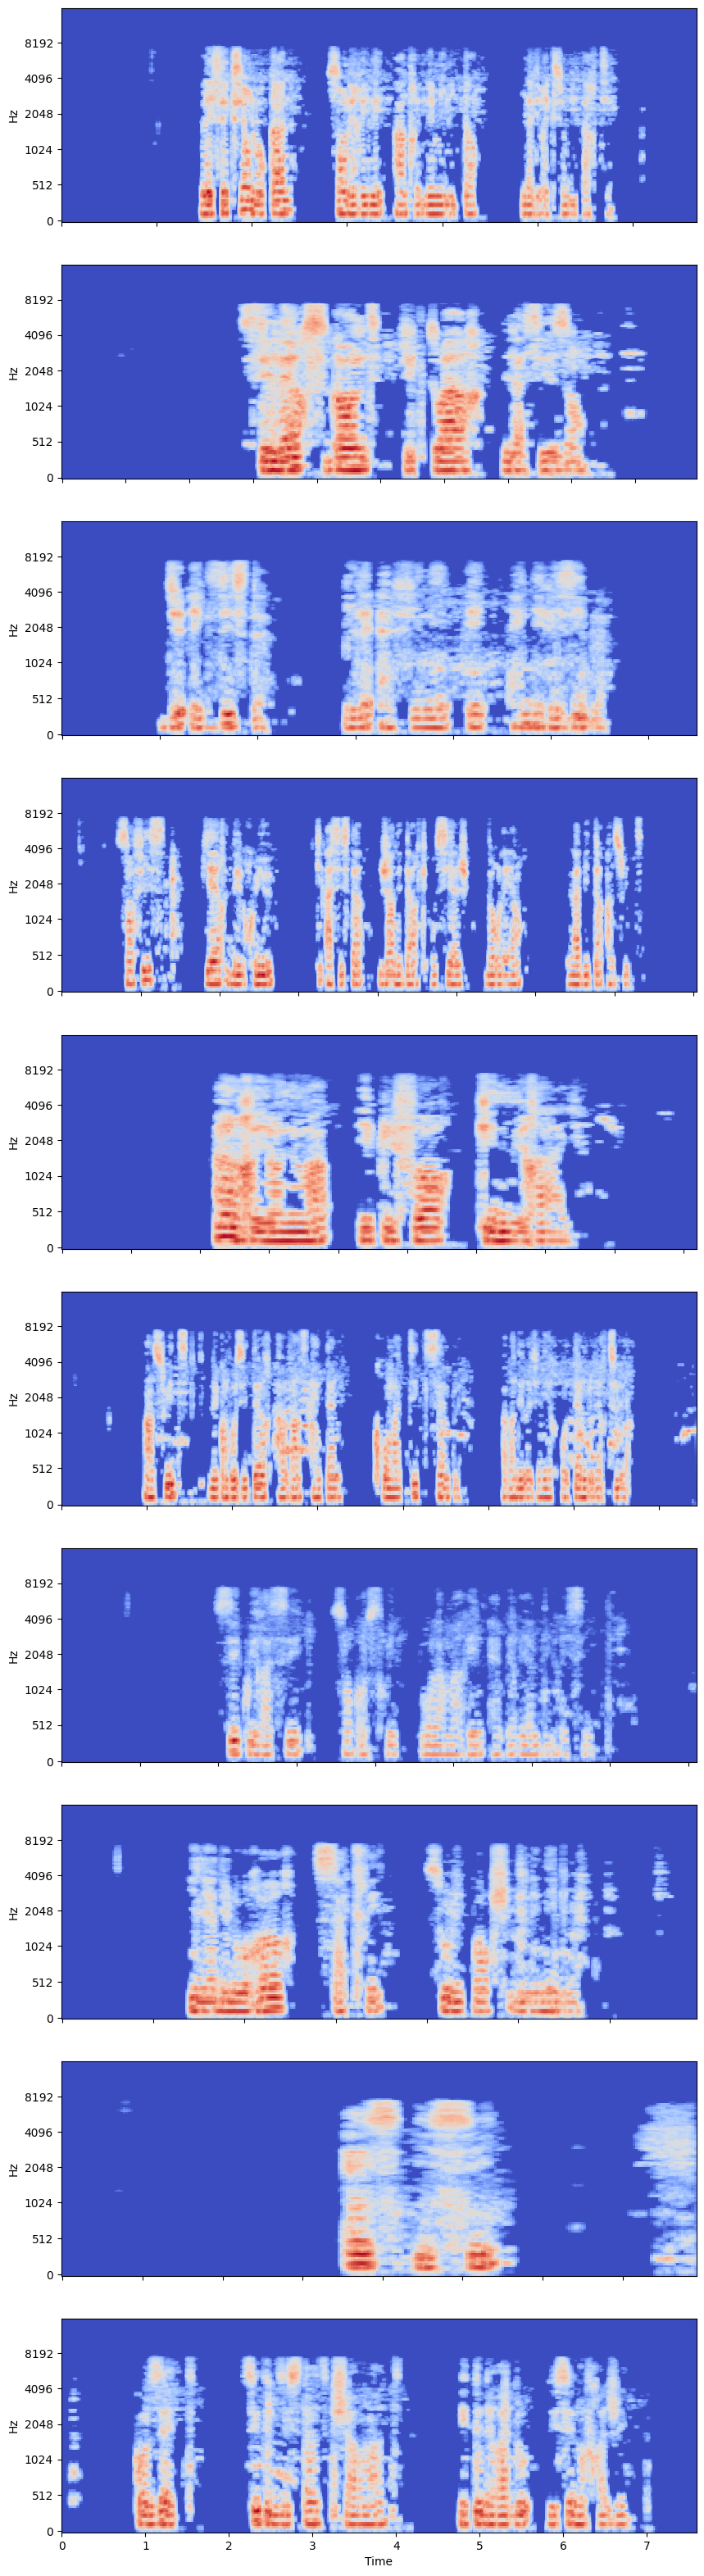

In [2]:
def main():
    print("Preprocessing of audio files")
    path = r"C:\Users\CPE\Downloads\cv-corpus-19.0-delta-2024-09-13-fr.tar\cv-corpus-19.0-delta-2024-09-13\fr\clips"
    processing = Processing()
    audio_files = processing.get_audio_files(path)

    mel_spectrograms = []
    sample_rates = []
    for audio in audio_files[:10]:
        audio_data, sample_rate = processing.get_audio_data(path + "\\" + audio)
        mel_spectrogram = processing.mel_spectrogram(audio_data, sample_rate)
        mel_spectrograms.append(mel_spectrogram)
        sample_rates.append(sample_rate)

    fig = processing.spectrogram_plot(mel_spectrograms, sample_rates)
    output_file = "mel_spectrogram.png"  # Change the extension for other formats (e.g., .pdf, .svg)
    plt.savefig(output_file, dpi=300, bbox_inches='tight')  # dpi controls quality; bbox_inches removes whitespace


    mel_spectrograms = []
    sample_rates = []
    for audio in audio_files[:10]:
        audio_data, sample_rate = processing.get_audio_data(path + "\\" + audio)
        filtered_audio_data = processing.passebas_filter(audio_data, sample_rate)
        mel_spectrogram = processing.mel_spectrogram(filtered_audio_data, sample_rate)
        mel_spectrograms.append(mel_spectrogram)
        sample_rates.append(sample_rate)
    
    processing.spectrogram_plot(mel_spectrograms, sample_rates)
    plt.savefig("mel_spectrogram_low_pass_filter.png", dpi=300, bbox_inches='tight')


    filtered = []
    plt.subplots(5, 2, figsize=(10, 4))
    for audio in audio_files[:10]:
        audio_data, sample_rate = processing.get_audio_data(path + "\\" + audio)
        filtered_audio_data = processing.spectral_substraction(audio_data, sample_rate)
        filtered_mel_spectrogram = processing.mel_spectrogram(filtered_audio_data, sample_rate)
        filtered.append(filtered_mel_spectrogram)
    
    processing.spectrogram_plot(filtered, sample_rates)
    plt.savefig("spectral_substraction.png", dpi=300, bbox_inches='tight')




if __name__ == "__main__":
    main()

In [ ]:
from IPython.display import display,Audio

path = r"C:\Users\CPE\Downloads\cv-corpus-19.0-delta-2024-09-13-fr.tar\cv-corpus-19.0-delta-2024-09-13\fr\clips"
process = PreprocessingPydub(path, path + "\\processed")

audio_files = process.get_audio_files(path)
print("raw audio")
for audio in audio_files[:10]:
    displaye = display(Audio(path + "\\" + audio)) # Display the audio waveform


print("processed audio")
for audio in audio_files[:10]:
    base_clip = process.mp3_to_wav(audio_files[0], path)
    print(base_clip)
    audio_processed = process.mp3_to_wav(audio, path)
    audio_processed = process.normalize(audio_processed, base_clip=base_clip)
    displaye = display(Audio(audio_processed)) # Display the audio waveform
    

raw audio


processed audio


TypeError: PreprocessingPydub.mp3_to_wav() missing 1 required positional argument: 'samples_path'